# Analiza nogometnih tekem v top 3 ligah
## Uvoz in obdelava

In [54]:
# Uvozimo vse knjižnice za delo

import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Uvozimo vse tabele

laliga = pd.read_csv('obdelani-podatki/laliga.csv')
premier_league = pd.read_csv('obdelani-podatki/premier_league.csv')
seriea = pd.read_csv('obdelani-podatki/seriea.csv')


# Dodamo stolpec držav v tabele
esp = len(laliga) * ['La Liga']
ita = len(laliga) * ['Serie A']
eng = len(laliga) * ['Premier League']

laliga['liga'] = esp
seriea['liga'] = ita
premier_league['liga'] = eng

In [56]:
# Vse tabele združimo v eno samo

lige = [laliga, premier_league, seriea]
league = pd.concat(lige)

league

,kolo,dan,datum,ura,id_domaci,lestvica_domaci,domaca_ekipa,id_gostje,lestvica_gostje,gostujoca_ekipa,zadetki_domaci,tocke_domaci,zadetki_gostje,tocke_gostje,liga
0,1,petek,"[19, 8, 16]",9:00 PM,621,11,Athletic,131,2,FC Barcelona,1,3,0,0,La Liga
1,1,sobota,"[19, 8, 17]",5:00 PM,940,17,Celta de Vigo,418,1,Real Madrid,1,0,3,3,La Liga
2,1,sobota,"[19, 8, 17]",7:00 PM,1049,9,Valencia,681,7,Real Sociedad,1,1,1,1,La Liga
3,1,sobota,"[19, 8, 17]",8:00 PM,237,19,RCD Mallorca,1533,14,SD Eibar,2,3,1,0,La Liga
4,1,sobota,"[19, 8, 17]",9:00 PM,1244,18,CD Leganés,331,10,CA Osasuna,0,0,1,3,La Liga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38,nedelja,"[20, 8, 2]",6:00 PM,2722,20,SPAL,430,10,Fiorentina,1,0,3,3,Serie A
376,38,nedelja,"[20, 8, 2]",8:45 PM,252,17,Genoa,276,9,Hellas Verona,3,3,0,0,Serie A
377,38,nedelja,"[20, 8, 2]",8:45 PM,1005,18,Lecce,130,11,Parma,3,0,4,3,Serie A
378,38,nedelja,"[20, 8, 2]",8:45 PM,1025,12,Bologna,416,16,Torino,1,1,1,1,Serie A


## Overjanje veljavnosti hipotez
### Hipoteza 1
Kot prvo hipotezo hočemo pokazati, da domača ekipa zmaga v več primerih kot gostujoča.

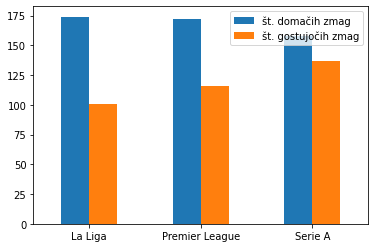

In [47]:
zmage_domacih = league[league.tocke_domaci > 1][['liga', 'tocke_domaci']]
zmage_gostov = league[league.tocke_domaci < 1][['liga', 'tocke_gostje']]

df1 = zmage_domacih.groupby('liga').count()
df2 = zmage_gostov.groupby('liga').count()

df = pd.concat([df1,df2], axis=1)
df = df.rename(columns={"tocke_domaci": "št. domačih zmag", "tocke_gostje": "št. gostujočih zmag"})

graf1 = df.plot.bar(rot=0) 
graf1.set(title='', ylabel='', xlabel='');


V zgornjem grafu je jasno vidno, da domače ekipe v vseh treh ligah zmagujejo večkrat kor gostujoče ekipe. Razlika je sicer največja v španski La Ligi, precej majhna pa je v italijanski Serie A.<br> Hipoteza 1 je torej potrjena: **Domače ekipe zmagujejo bolj pogosto kot gostujoče.**

### Hipoteza 2
Kot drugo hipotezo bom želel pokazati, da prisotnost navijačev dejansko vpliva na končni rezultat. Odstotek zmag domačih ekip po korona premoru bi se torej moral zmanjšati. Pred tem odmorom so namreč domače ekipe imele spodbudo navijačev na njihovih tekmah, po njem pa so zaradi korona restrikcij tribune morale ostati prazne. <br>
V Angliji se je odmor začel 4.1.2020 in končal 16.6.2020, v Italiji je trajal od 10.3.2020 do 21.6,2020, v Španiji pa od 4.1.2020 do 2.6.2020.

In [57]:
# Uvoz pomožnih funkcij
from pomozne_funkcije import relacija_datumov

# Mejni datum, ki velja za vse tri lige je 15.3.2020
mejni_datum = [20, 3, 15]

zmage_domacih = league[league.tocke_domaci > 1]
predkoronska = zmage_domacih[relacija_datumov(league.datum, mejni_datum)]

predkoronska

TypeError: expected string or bytes-like object